### Homework 2
Darren Lund

1) Load the digits in scikit learn.

In [1]:
from sklearn import datasets
from sklearn import neighbors as nbs
from matplotlib import pyplot as plt
import time
import numpy as np
digits = datasets.load_digits()

2) Split the data into 30% test and 70% training sets.

In [2]:
data = digits.data
n,m = data.shape
train_size = (7*n)//10
train_x = data[:train_size,:]
train_y = digits.target[:train_size]
test = data[train_size:,:]
test_act = digits.target[train_size:]

3) Plot the first 8 images.

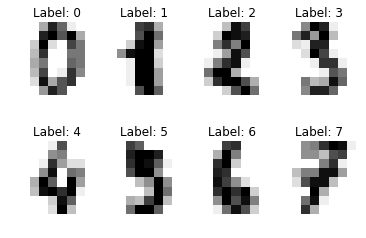

In [3]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Label: %i' % label)
plt.show()

4) For each value of k in 1, 2, 3, 4, 5, 10, 20:
- Time how long it takes to train the scikit-learn k-nearest neighbors classifier with brute-force algorithm neighbors.KNeighborClassifier(algorithm = 'brute') on your training set.
- Time how long it takes to classify all the images in 1/3 of the test set (10% of the total data), and again for 2/3, and again for the whole test set.
- Use your full test set to evaluate accuracy of the classifier.

In [15]:
ks = [1,2,3,4,5,10,20]
s = len(test)//3
t = 2*len(test)//3
train_times = []
class_times_1 = []
class_times_2 = []
class_times_3 = []
accuracies = []
for k in ks :
    t_start = time.time()
    classifier = nbs.KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    classifier.fit(train_x,train_y)
    t_end = time.time()
    train_times.append(t_end-t_start)
    c_start = time.time()
    res = classifier.predict(test[:s])
    c_end = time.time()
    class_times_1.append(c_end-c_start)
    c_start = time.time()
    res = classifier.predict(test[:t])
    c_end = time.time()
    class_times_2.append(c_end-c_start)
    c_start = time.time()
    full_res = classifier.predict(test)
    c_end = time.time()
    class_times_3.append(c_end-c_start)
    x = [full_res[i]-test_act[i] for i in range(len(full_res))]
    accuracies.append(1-np.count_nonzero(x)/len(x))

In [17]:
print('Training Times : ' + str(train_times) + '\n')
print('Classifying 10% : ' + str(class_times_1) + '\n')
print('Classifying 20% : ' + str(class_times_2) + '\n')
print('Classifying full : ' + str(class_times_3) + '\n')
print('Accuracies : '+str(accuracies))

Training Times : [0.001458883285522461, 0.0006127357482910156, 0.0006160736083984375, 0.0006070137023925781, 0.0007739067077636719, 0.0006098747253417969, 0.0006539821624755859]

Classifying 10% : [0.01036214828491211, 0.0054759979248046875, 0.00518798828125, 0.0069980621337890625, 0.007185935974121094, 0.007061004638671875, 0.007493019104003906]

Classifying 20% : [0.019992828369140625, 0.012006044387817383, 0.010666847229003906, 0.013477087020874023, 0.013562917709350586, 0.013994932174682617, 0.014739036560058594]

Classifying full : [0.015992164611816406, 0.016262054443359375, 0.014321327209472656, 0.020238876342773438, 0.019685745239257812, 0.020531415939331055, 0.021149396896362305]

Accuracies : [0.9611111111111111, 0.962962962962963, 0.9703703703703703, 0.9666666666666667, 0.9648148148148148, 0.9574074074074074, 0.9518518518518518]


5) Choose a random permutation of the integers [0,...,63], and permute all the features (pixel values) of both the test and training using this permutation. Using the best choice of k (that you found in the previous step), retrain the classifier on the training set and evaluate it on the test set. The classification accuracy should be the same as for the un-permuted version. What does this say about the role of the spatial relationships in this classification algorithm?

In [14]:
np.set_printoptions(threshold=np.nan)
perm = np.random.randint(0,64)
new_train = np.roll(train_x,perm,axis=1)
new_test = np.roll(test,perm,axis=1)
# From above, 3 is the best k
classifier = nbs.KNeighborsClassifier(n_neighbors=3,algorithm='brute')
classifier.fit(new_train,train_y)
new_res = classifier.predict(new_test)
x = [new_res[i] - test_act[i] for i in range(len(new_res))]
acc = 1-np.count_nonzero(x)/len(x)
print('Accuracy : ' +str(acc))

Accuracy : 0.9703703703703703


It tells us that the vertical relationships aren't very important so long as the horizontal are preserved.  You could probably place the different rows of the images in a random order and still have a good accuracy rate so long you didn't alter the wors.